Prerequisites: 

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

1. Import the CO2 levels dataset from statsmodels

In [2]:
#Load data and drop missing value
CO2_data = sm.datasets.co2.load_pandas().data
print(CO2_data.head())

              co2
1958-03-29  316.1
1958-04-05  317.3
1958-04-12  317.6
1958-04-19  317.5
1958-04-26  316.4


2. Plot the time series to perform a visual inspection

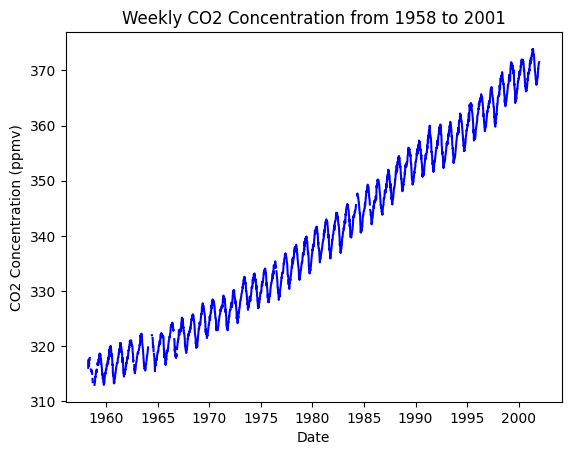

In [3]:
#Plot time series
plt.plot(CO2_data['co2'], label='CO2 levels', color='blue')
plt.title('Weekly CO2 Concentration from 1958 to 2001')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppmv)')
plt.show()

3. Check for missing data

In [4]:
CO2_data.isnull().sum()

co2    59
dtype: int64

4. Use interpolation to fill missing data

In [5]:
#Fill missing data using interpolation and recheck for missing data
CO2_data['co2'].interpolate(method='linear', inplace=True)
CO2_data.isnull().sum()

co2    0
dtype: int64

5. Transform the dataset into a supervised machine learning format

In [7]:
#Make a copy of the data
CO2_data = CO2_data.copy()

#Create target column
CO2_data['Target'] = CO2_data['co2'].shift(-1)
CO2_data

,co2,Target
1958-03-29,316.1,317.3
1958-04-05,317.3,317.6
1958-04-12,317.6,317.5
1958-04-19,317.5,316.4
1958-04-26,316.4,316.9
...,...,...
2001-12-01,370.3,370.8
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3
2001-12-22,371.3,371.5


6. Prepare dataset for prediction

In [8]:
#Drop the last missing value
CO2_data= CO2_data.drop(CO2_data.tail(1).index)
CO2_data.tail(3)

,co2,Target
2001-12-08,370.8,371.2
2001-12-15,371.2,371.3
2001-12-22,371.3,371.5


7. Divide the dataset into training and test set

In [9]:
#Split into test: last 104 values, and training: remaining values
train_data = CO2_data.iloc[:-104]
test_data = CO2_data.iloc[-104:] 

print(f'Shape of training set: {train_data.shape}')
print(f'Shape of test set {test_data.shape}')

Shape of training set: (2179, 2)
Shape of test set (104, 2)


8. Create a baseline model

In [10]:
#Make another copy of the test set
test_data_baseline = test_data.copy()
#Create a new column for baseline prediction
test_data['Baseline_pred'] = test_data['co2']
test_data.head(5)

,co2,Target,Baseline_pred
2000-01-01,368.6,368.5,368.6
2000-01-08,368.5,369.0,368.5
2000-01-15,369.0,369.8,369.0
2000-01-22,369.8,369.2,369.8
2000-01-29,369.2,369.1,369.2


9. Use Decision Tree to forecast observations

In [11]:
#Reshape the sets into column vectors
X_train_reshaped = train_data['co2'].values.reshape(-1, 1) 
y_train_reshaped = train_data['Target'].values.reshape(-1, 1)
X_test_reshaped = test_data['co2'].values.reshape(-1, 1)  

In [12]:
#Initialize the model and fit the model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_reshaped, y_train_reshaped)

DecisionTreeRegressor(random_state=42)

In [13]:
#Make prediction
dt_prediction = dt_model.predict(X_test_reshaped)

In [14]:
#Assign prediction to a new column 
test_data['dt_prediction'] = dt_prediction
test_data.head(5)

,co2,Target,Baseline_pred,dt_prediction
2000-01-01,368.6,368.5,368.6,368.00
2000-01-08,368.5,369.0,368.5,368.65
2000-01-15,369.0,369.8,369.0,368.50
2000-01-22,369.8,369.2,369.8,369.40
2000-01-29,369.2,369.1,369.2,369.10


10. Use GradientBoosting to forecast observations

In [30]:
#Initialize the model
GradientBoost = GradientBoostingRegressor(random_state = 42)

In [16]:
#Fit the model on the training set
GradientBoost.fit(X_train_reshaped, y_train_reshaped)

GradientBoostingRegressor(random_state=42)

In [17]:
#Make Predictions
GradientBoostPred = GradientBoost.predict(X_test_reshaped)

In [18]:
#Assign prediction to a new column
test_data['GradientBoostPred'] = GradientBoostPred
test_data.head(5)

,co2,Target,Baseline_pred,dt_prediction,GradientBoostPred
2000-01-01,368.6,368.5,368.6,368.00,368.338161
2000-01-08,368.5,369.0,368.5,368.65,368.564620
2000-01-15,369.0,369.8,369.0,368.50,368.779835
2000-01-22,369.8,369.2,369.8,369.40,369.524641
2000-01-29,369.2,369.1,369.2,369.10,369.047163


11. Use Random Forest to forecast observations

In [19]:
#Initialize the model
RandomForecast = RandomForestRegressor(n_estimators = 1000)

In [20]:
#Fit the model on the training set
RandomForecast.fit(X_train_reshaped, y_train_reshaped)

RandomForestRegressor(n_estimators=1000)

In [21]:
#Make predictions
RandomForecastPred = RandomForecast.predict(X_test_reshaped)

In [22]:
#Assign prediction to a new column
test_data['rfr_pred'] = RandomForecastPred

In [23]:
test_data.head(5)

,co2,Target,Baseline_pred,dt_prediction,GradientBoostPred,rfr_pred
2000-01-01,368.6,368.5,368.6,368.00,368.338161,368.041316
2000-01-08,368.5,369.0,368.5,368.65,368.564620,368.633903
2000-01-15,369.0,369.8,369.0,368.50,368.779835,368.678596
2000-01-22,369.8,369.2,369.8,369.40,369.524641,369.489040
2000-01-29,369.2,369.1,369.2,369.10,369.047163,369.018250


12. Evaluate models

In [24]:
#Mean Absolute Percentage Error using a function
def mape(Target_true, Target_pred):
    return round(np.mean(np.abs((Target_true - Target_pred)/Target_true))*100, 2)

In [29]:
#MAPE for each initialized model
baseline_mape = mape(test_data['Target'], test_data['Baseline_pred'])
dt_mape = mape(test_data['Target'], test_data['dt_prediction'])
gbr_mape = mape(test_data['Target'], test_data['GradientBoostPred'])
rfr_mape = mape(test_data['Target'], test_data['rfr_pred'])

#MAPE results
print(f'Baseline: {baseline_mape}%')
print(f'Decision Tree: {dt_mape}%')
print(f'Gradient Boosting: {gbr_mape}%')
print(f'Random Forest: {rfr_mape}%')

Baseline: 0.1%
Decision Tree: 0.21%
Gradient Boosting: 0.19%
Random Forest: 0.2%


In [31]:
#Mean Squared Error metrics
baseline_mse = mean_squared_error(test_data['Target'], test_data['Baseline_pred'])
dt_mse = mean_squared_error(test_data['Target'], test_data['dt_prediction'])
gbr_mse = mean_squared_error(test_data['Target'], test_data['GradientBoostPred'])
rfr_mse = mean_squared_error(test_data['Target'], test_data['rfr_pred'])

#MSE results
print(f'Baseline: {baseline_mse}')
print(f'Decision Tree: {dt_mse}')
print(f'Gradient Boosting: {gbr_mse}')
print(f'Random Forest: {rfr_mse}')

Baseline: 0.20105769230769138%
Decision Tree: 1.0164502403846176%
Gradient Boosting: 0.9225864479003109%
Random Forest: 0.9577059515585501%


In [32]:
#Mean Absolute Error
baseline_mae = mean_absolute_error(test_data['Target'], test_data['Baseline_pred'])
dt_mae = mean_absolute_error(test_data['Target'], test_data['dt_prediction'])
gbr_mae = mean_absolute_error(test_data['Target'], test_data['GradientBoostPred'])
rfr_mae = mean_absolute_error(test_data['Target'], test_data['rfr_pred'])

#MAE results
print(f'Baseline: {baseline_mae}')
print(f'Decision Tree: {dt_mae}')
print(f'Gradient Boosting: {gbr_mae}')
print(f'Random Forest: {rfr_mae}')

Baseline: 0.3682692307692271%
Decision Tree: 0.7641826923076936%
Gradient Boosting: 0.7011163500247767%
Random Forest: 0.7285091170636722%


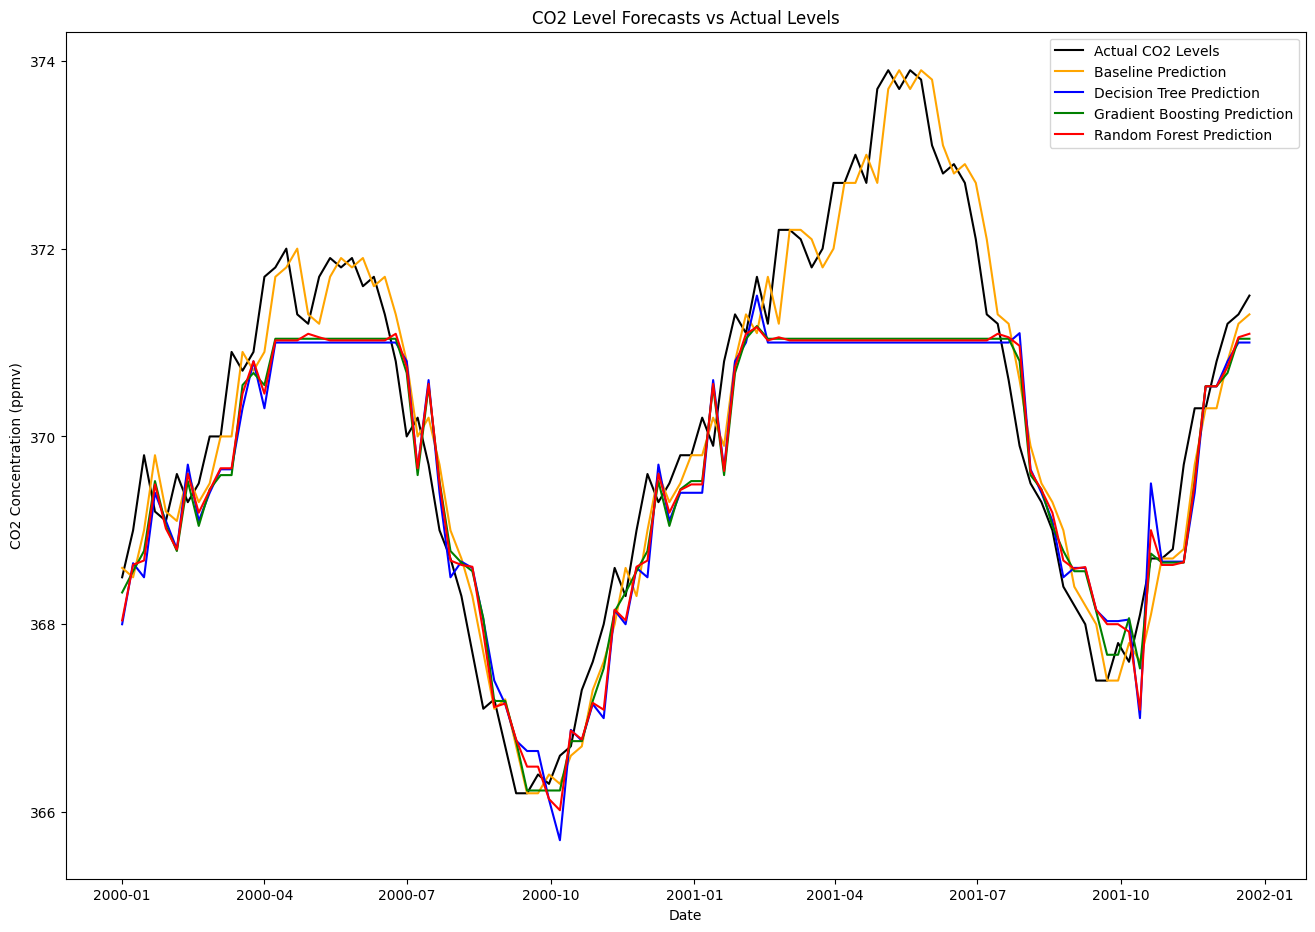

In [35]:
#Graph the predictions vs actual
plt.figure(figsize=(16, 11))

plt.plot(test_data.index, test_data['Target'], label='Actual CO2 Levels', color='black')
plt.plot(test_data.index, test_data['Baseline_pred'], label='Baseline Prediction', color='orange')
plt.plot(test_data.index, test_data['dt_prediction'], label='Decision Tree Prediction', color='blue')
plt.plot(test_data.index, test_data['GradientBoostPred'], label='Gradient Boosting Prediction', color='green')
plt.plot(test_data.index, test_data['rfr_pred'], label='Random Forest Prediction', color='red')


plt.title('CO2 Level Forecasts vs Actual Levels')
plt.xlabel('Date')
plt.ylabel('CO2 Concentration (ppmv)')
plt.legend()

plt.show() 